<a href="https://colab.research.google.com/github/nifedara/Investigation-of-decline-in-Netflix-movies-durations-over-the-years/blob/main/Investigating_Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

In [ ]:
movie_dict = {'years' : years,
              'durations' : durations    
}
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [ ]:
import pandas as pd

movie_dict_df = pd.DataFrame(movie_dict)

In [ ]:
print(movie_dict_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


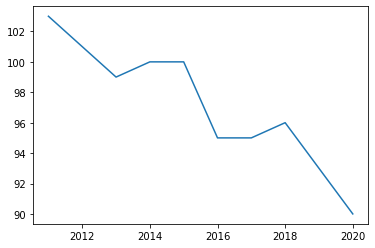

In [ ]:
import matplotlib.pyplot as plt

plt.plot(movie_dict_df['years'], movie_dict_df['durations'])
plt.show()

In [21]:
netflix_df = pd.read_csv("/content/netflix_data.csv")

In [22]:
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [23]:
netflix_df_movie_only = netflix_df[netflix_df['type'] == 'Movie']

In [24]:
netflix_movie_subset = netflix_df_movie_only[['type', 'duration', 'title', 'release_year', 'genre']]

print(netflix_movie_subset)

       type  duration                                    title  release_year  \
1     Movie        93                                     7:19          2016   
2     Movie        78                                    23:59          2011   
3     Movie        80                                        9          2009   
4     Movie       123                                       21          2008   
6     Movie        95                                      122          2019   
...     ...       ...                                      ...           ...   
7781  Movie        88                                     Zoom          2006   
7782  Movie        99                                     Zozo          2005   
7783  Movie       111                                   Zubaan          2015   
7784  Movie        44                        Zulu Man in Japan          2019   
7786  Movie        90  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          2019   

              genre  
1            Dram

In [25]:
small_duration_movies = netflix_movie_subset[netflix_movie_subset['duration'] < 60]

In [ ]:
print(small_duration_movies[0:20])

      type  duration                                              title  \
35   Movie        56                                          #Rucker50   
55   Movie        44                100 Things to do Before High School   
67   Movie        37  13TH: A Conversation with Oprah Winfrey & Ava ...   
101  Movie        53                                  3 Seconds Divorce   
146  Movie        28                                     A 3 Minute Hug   
162  Movie        22  A Christmas Special: Miraculous: Tales of Lady...   
171  Movie        29                         A Family Reunion Christmas   
177  Movie        22                    A Go! Go! Cory Carson Christmas   
178  Movie        22                    A Go! Go! Cory Carson Halloween   
179  Movie        21                  A Go! Go! Cory Carson Summer Camp   
181  Movie        59             A Grand Night In: The Story of Aardman   
200  Movie        20                            A Love Song for Latasha   
220  Movie        44     

In [26]:
#to plot a scatter plot to show how a oarticular sets of genre of movies are dragging down the average movie durations
#use different colors for different genres
#create the color specifier

#first an empty colors list
colors = []

#iterate throught the rows of the dataframe to get the row needed- 'genre'
for label, row in netflix_movie_subset.iterrows():
  #if statement to assign a type of genre to a specific color
  if row['genre'] == 'Children':
     colors.append('red')
  elif row['genre'] == 'Documentaries':
     colors.append('blue')
  elif row['genre'] == 'Stand-Up' :
     colors.append('green')
  else:
     colors.append('black')
  
#print the first 10 items on the color list
print(colors[0:10])
  

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


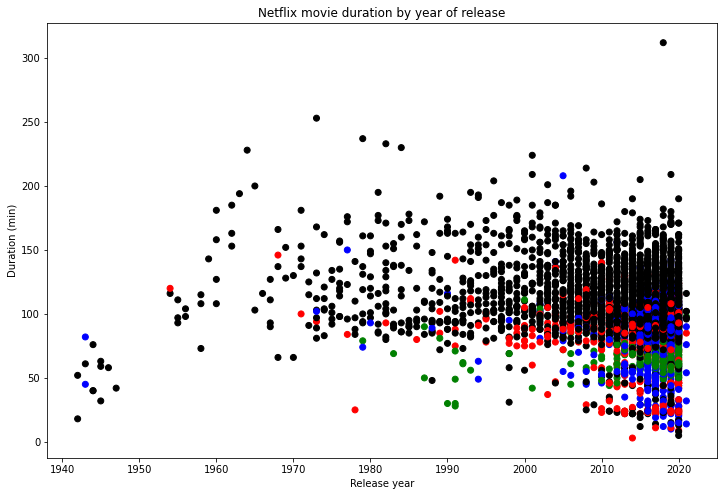

In [29]:
#next, plotting

fig = plt.figure(figsize = (12,8))
plt.scatter(netflix_movie_subset["release_year"], netflix_movie_subset["duration"], c=colors)

#title and labels
plt.title("Netflix movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

plt.show()

In [30]:
#observation from this exploratory analysis: 
#A lot of movies of genre types: Children, Documentaries, Stand-Up seem to be at the bottom. 
#It makes say to that movies of those types are the ones bringing down the yearly duration average. 
#But we can't draw a conclusion until we perform additional analysis